In [24]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#from pathlib import Path


In [25]:


#data_df = Path("Resources/us_states_covid19_daily.csv")

data_df = pd.read_csv("Resources/us_states_covid19_daily.csv")
data_df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [26]:
#data_df.info()


In [27]:
#data_df.columns

In [28]:
daily_data = pd.read_csv("Resources/us_covid19_daily.csv")

daily_data

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201206,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,20201205,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,...,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,20201204,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,...,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db
3,20201203,56,13921360,158026052,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,...,198404712,2020-12-03T24:00:00Z,0,0,2706,5331,1238465,210204,1828230,0f253d185ecb336cdd18a4c61996eda1b7eef13b
4,20201202,56,13711156,156787587,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,...,196576482,2020-12-02T24:00:00Z,0,0,2733,5028,982032,195796,1459202,477c17b6302d0485195e77ecf8270a974f7a3c82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,20200126,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-26T24:00:00Z,0,0,0,0,0,0,0,69c67c81e64d10a5270497fc5336779c06fb812b
316,20200125,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-25T24:00:00Z,0,0,0,0,0,0,0,9ea5731f5b0a79617b994d6842eecfdbeb1dde35
317,20200124,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-24T24:00:00Z,0,0,0,0,0,0,0,287531342bc8d5f2650b0cc12ebcca3807a64b7b
318,20200123,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-23T24:00:00Z,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981


In [29]:
counties_data = pd.read_csv("Resources/us_counties_covid19_daily.csv")
counties_data 
# counties_data["deaths"] = counties_data["deaths"].map("{:,.2f}".format)
# counties_data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [30]:
# merging states and daily together 

merge_data = pd.merge(data_df,daily_data,on="date")
merge_data

# I think i did something wrong here if you look at deathIncrease_y the value are the same 
# so merging them is not a good idea.  

,date,state,positive_x,probableCases,negative_x,pending_x,totalTestResultsSource,totalTestResults_x,hospitalizedCurrently_x,hospitalizedCumulative_x,...,totalTestResults_y,lastModified,total_y,posNeg_y,deathIncrease_y,hospitalizedIncrease_y,negativeIncrease_y,positiveIncrease_y,totalTestResultsIncrease_y,hash_y
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,20200124,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,2,2020-01-24T24:00:00Z,0,0,0,0,0,0,0,287531342bc8d5f2650b0cc12ebcca3807a64b7b
15629,20200123,MA,NaN,NaN,NaN,NaN,totalTestsViral,2.0,NaN,NaN,...,2,2020-01-23T24:00:00Z,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981
15630,20200123,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,2,2020-01-23T24:00:00Z,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981
15631,20200122,MA,NaN,NaN,NaN,NaN,totalTestsViral,1.0,NaN,NaN,...,1,2020-01-22T24:00:00Z,0,0,0,0,0,0,0,e0caa1c66c4aa83baf227afe12261a1493fc0d7e


In [31]:
clean_data = merge_data.drop(['totalTestResultsSource', 'lastModified', 'hash_y'], axis=1)
clean_data


,date,state,positive_x,probableCases,negative_x,pending_x,totalTestResults_x,hospitalizedCurrently_x,hospitalizedCumulative_x,inIcuCurrently_x,...,death_y,hospitalized_y,totalTestResults_y,total_y,posNeg_y,deathIncrease_y,hospitalizedIncrease_y,negativeIncrease_y,positiveIncrease_y,totalTestResultsIncrease_y
0,20201206,AK,35720.0,NaN,1042056.0,NaN,1077776.0,164.0,799.0,NaN,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,1645041.0,1927.0,26331.0,NaN,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,1763150.0,1076.0,9401.0,374.0,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
3,20201206,AS,0.0,NaN,2140.0,NaN,2140.0,NaN,NaN,NaN,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,2370499.0,2977.0,28248.0,714.0,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,20200124,WA,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,2,0,0,0,0,0,0,0
15629,20200123,MA,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,2,0,0,0,0,0,0,1
15630,20200123,WA,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,2,0,0,0,0,0,0,1
15631,20200122,MA,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1,0,0,0,0,0,0,0


In [32]:
clean_data = clean_data.fillna(0)
clean_data


,date,state,positive_x,probableCases,negative_x,pending_x,totalTestResults_x,hospitalizedCurrently_x,hospitalizedCumulative_x,inIcuCurrently_x,...,death_y,hospitalized_y,totalTestResults_y,total_y,posNeg_y,deathIncrease_y,hospitalizedIncrease_y,negativeIncrease_y,positiveIncrease_y,totalTestResultsIncrease_y
0,20201206,AK,35720.0,0.0,1042056.0,0.0,1077776.0,164.0,799.0,0.0,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
1,20201206,AL,269877.0,45962.0,1421126.0,0.0,1645041.0,1927.0,26331.0,0.0,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
2,20201206,AR,170924.0,22753.0,1614979.0,0.0,1763150.0,1076.0,9401.0,374.0,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
3,20201206,AS,0.0,0.0,2140.0,0.0,2140.0,0.0,0.0,0.0,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
4,20201206,AZ,364276.0,12590.0,2018813.0,0.0,2370499.0,2977.0,28248.0,714.0,...,273374.0,585676.0,204063869,0,0,1138,2256,1172590,176771,1634532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,20200124,WA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,0,0,0,0,0,0,0
15629,20200123,MA,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,2,0,0,0,0,0,0,1
15630,20200123,WA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,0,0,0,0,0,0,1
15631,20200122,MA,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0


In [43]:
death_sum = counties_data.groupby('state')['deaths'].sum().reset_index()
death_avg = counties_data.groupby('state')['deaths'].mean().reset_index()

case_avg = counties_data.groupby('state')['cases'].mean().reset_index()
case_sum = counties_data.groupby('state')['cases'].sum().reset_index()
hospitalized = data_df.groupby('state')['hospitalizedCumulative'].sum().reset_index()

hospitalizedIncrease = data_df.groupby('state')['hospitalizedIncrease'].sum().reset_index()

state_avg = pd.merge(death_avg,case_avg, on="state")
df = pd.merge(hospitalized,hospitalizedIncrease, on="state")

state_sum = pd.merge(death_sum,case_sum, on="state")
# feel free to explore before we start graphing.
state_sum

,state,deaths,cases
0,Alabama,413394.0,24024159
1,Alaska,8638.0,1747498
2,Arizona,845363.0,35564144
3,Arkansas,203418.0,13267810
4,California,2479213.0,127488272
5,Colorado,432353.0,15548407
6,Connecticut,974773.0,13042369
7,Delaware,123505.0,3875709
8,District of Columbia,127280.0,2965627
9,Florida,2101392.0,107316623


In [34]:
top_death = state_avg.sort_values("deaths", ascending = False)
top_death.head()

,state,deaths,cases
31,New Jersey,568.132450,7865.803872
33,New York,482.792157,6830.501176
22,Massachusetts,473.491120,7211.012087
8,District of Columbia,464.525547,10823.456204
6,Connecticut,410.430737,5491.523789


In [35]:
top_death.tail()

,state,deaths,cases
49,Virgin Islands,3.366165,194.419467
27,Montana,3.231878,268.692362
54,Wyoming,2.035919,265.010585
1,Alaska,1.451033,293.549135
36,Northern Mariana Islands,1.128440,28.635321


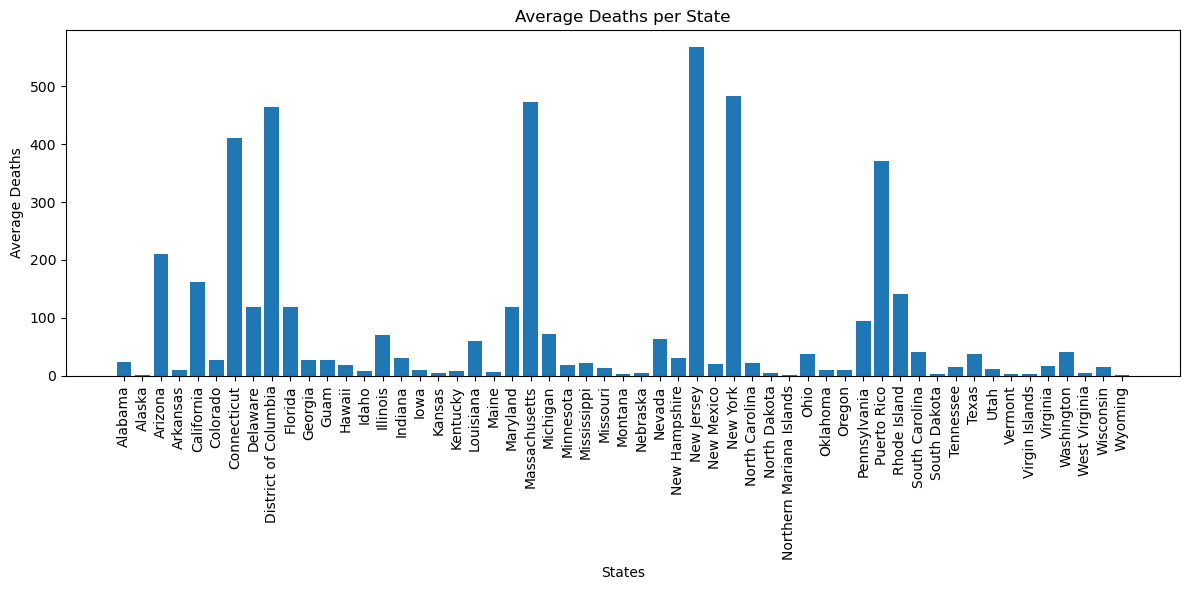

In [36]:
plt.figure(figsize=(12, 6)) 
plt.bar(state_avg['state'], state_avg['deaths'])
plt.xlabel('States')
plt.ylabel('Average Deaths')
plt.title('Average Deaths per State')
plt.xticks(rotation='vertical')  
plt.tight_layout()  
plt.show()

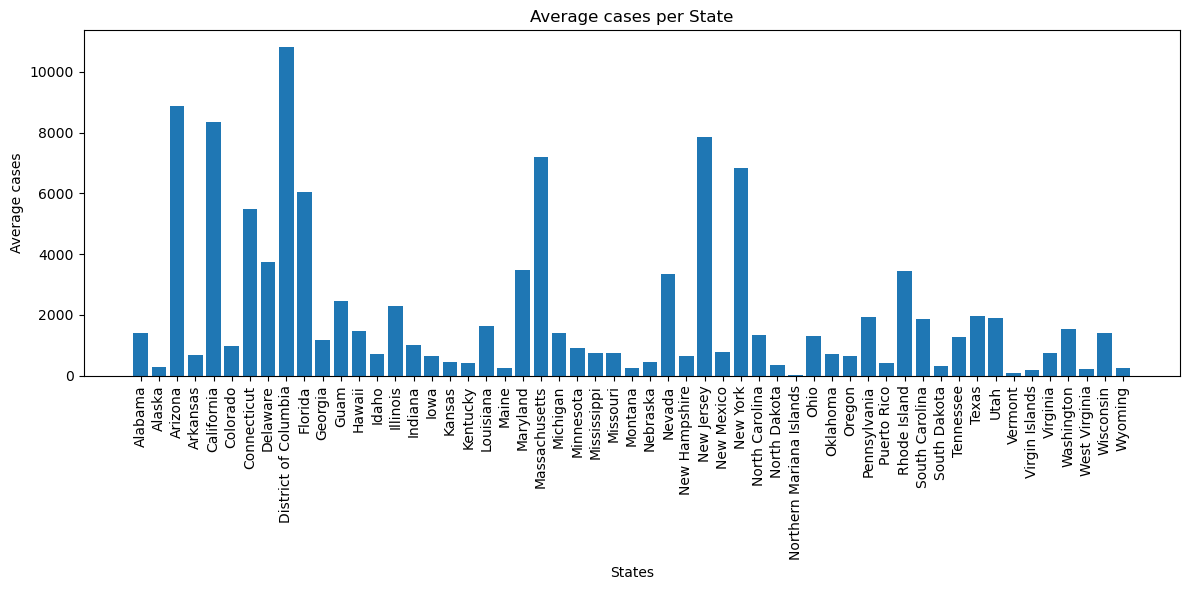

In [37]:
plt.figure(figsize=(12, 6)) 
plt.bar(state_avg['state'], state_avg['cases'])
plt.xlabel('States')
plt.ylabel('Average cases')
plt.title('Average cases per State')
plt.xticks(rotation='vertical')  
plt.tight_layout() 
plt.show()